In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transacoesdf = pd.read_csv('transactions.csv')

In [3]:
transacoesdf 

,IDTransação,IDpessoal,DatadaTransação,Valor,Empresa,Categoria,Fraude
0,462e62ea-3043-444d-a60d-3a6a97d2d161,c0af4019-632c-49a7-ac4f-134252317405,2024-06-29 05:21:22,329.84,Hull-Gonzalez,Mercado,0
1,2cb4a99f-4ea6-4735-8d94-0a34b1bdb9df,fec80d8a-1b1d-4f1d-aca1-1ad428d3aaf0,2024-03-30 09:00:51,794.27,"Butler, Johnson and Jackson",Mercado,0
2,23f4c589-48e1-4369-881d-f43a4e52574c,66ee19a6-ce84-4117-b786-5215bf4f8e96,2024-06-26 03:05:02,690.00,Burke LLC,Mercado,0
3,35bd35e9-7bc2-4355-9068-2617bbe76b31,fd30df63-36a2-4818-92ce-8c4753ba2934,2024-04-28 04:40:46,321.69,Lowe PLC,Padaria,0
4,dba5b783-f564-443d-abd7-587f2c63dbf8,55849ccf-21bb-4b16-9d32-95a330e6be66,2024-03-31 18:16:23,631.12,"Williams, Velasquez and Chavez",Roupas,0
...,...,...,...,...,...,...,...
995,1243c4fe-84f9-462b-91d6-6427497ecddf,95de12ee-091d-4621-88eb-cfc7951b7892,2024-03-20 11:42:29,682.60,Aguirre Ltd,Eletronicos,0
996,fcb73e1a-5b14-42bc-ab0f-0c7ac8da5548,72a6c98f-bde6-48ec-945d-63184dd74413,2024-01-20 16:07:26,325.42,Rodgers-Lucas,Padaria,0
997,469533a2-dc7b-43dd-991e-82d4cca07093,521f39cf-3ed2-497e-aa03-b0375e379fab,2024-04-30 05:24:00,388.54,"Smith, Patterson and Lamb",Viagens,0
998,3c86a932-f7bd-41fb-ab83-6e3923135f1a,91b1222b-6c61-4deb-91a4-206758ab7ddd,2024-04-18 15:25:40,545.53,Benson Group,Eletronicos,0


In [4]:
print(transacoesdf.shape)

(1000, 7)


In [5]:
print(transacoesdf.dtypes)

IDTransação         object
IDpessoal           object
DatadaTransação     object
Valor              float64
Empresa             object
Categoria           object
Fraude               int64
dtype: object


In [6]:
print(transacoesdf.describe())

             Valor       Fraude
count  1000.000000  1000.000000
mean    512.436520     0.036000
std     284.608189     0.186383
min      10.240000     0.000000
25%     272.482500     0.000000
50%     500.735000     0.000000
75%     761.107500     0.000000
max     998.630000     1.000000


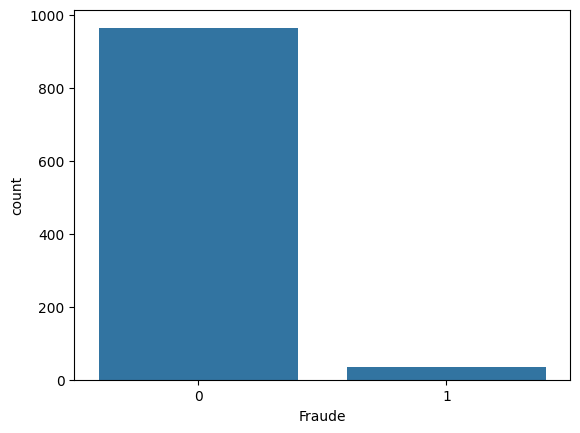

In [7]:
sns.countplot(data=transacoesdf, x="Fraude")
plt.show()

In [8]:
#Extração dos dados

from sklearn.preprocessing import LabelEncoder
transacoesdf['DatadaTransação'] = pd.to_datetime(transacoesdf['DatadaTransação'])
transacoesdf['TransacaoMensal'] = transacoesdf['DatadaTransação'].dt.month
transacoesdf['TransacaoDiaria'] = transacoesdf['DatadaTransação'].dt.day

In [9]:
le = LabelEncoder()
transacoesdf['Empresa'] = le.fit_transform(transacoesdf['Empresa'])
transacoesdf['Categoria'] = le.fit_transform(transacoesdf['Categoria'])

In [10]:
print(transacoesdf.head())

                            IDTransação                             IDpessoal  \
0  462e62ea-3043-444d-a60d-3a6a97d2d161  c0af4019-632c-49a7-ac4f-134252317405   
1  2cb4a99f-4ea6-4735-8d94-0a34b1bdb9df  fec80d8a-1b1d-4f1d-aca1-1ad428d3aaf0   
2  23f4c589-48e1-4369-881d-f43a4e52574c  66ee19a6-ce84-4117-b786-5215bf4f8e96   
3  35bd35e9-7bc2-4355-9068-2617bbe76b31  fd30df63-36a2-4818-92ce-8c4753ba2934   
4  dba5b783-f564-443d-abd7-587f2c63dbf8  55849ccf-21bb-4b16-9d32-95a330e6be66   

      DatadaTransação   Valor  Empresa  Categoria  Fraude  TransacaoMensal  \
0 2024-06-29 05:21:22  329.84      414          2       0                6   
1 2024-03-30 09:00:51  794.27      112          2       0                3   
2 2024-06-26 03:05:02  690.00      106          2       0                6   
3 2024-04-28 04:40:46  321.69      532          3       0                4   
4 2024-03-31 18:16:23  631.12      947          4       0                3   

   TransacaoDiaria  
0               29  
1 

In [11]:
#Predição

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

features = ['Valor','Empresa', 'Categoria', 'TransacaoMensal', 'TransacaoDiaria']
X = transacoesdf[features]
y = transacoesdf['Fraude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[197   0]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       0.00      0.00      0.00         3

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



c:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Os resultados compartilhados são de uma matriz de confusão e um relatório de classificação para um modelo de classificação, RandomForestClassifier.

### Matriz de Confusão
A matriz de confusão é representada assim:
```
[[197   0]
 [  3   0]]
```
- **197**: Número de transações não fraudulentas corretamente classificadas como não fraudulentas (True Negatives).
- **0**: Número de transações não fraudulentas incorretamente classificadas como fraudulentas (False Positives).
- **3**: Número de transações fraudulentas incorretamente classificadas como não fraudulentas (False Negatives).
- **0**: Número de transações fraudulentas corretamente classificadas como fraudulentas (True Positives).

### Relatório de Classificação
O relatório de classificação fornece as métricas de precisão, recall e f1-score para cada classe.

#### Classe 0 (Não Fraudulenta)
- **Precision (Precisão)**: 0.98
  - A precisão é a proporção de verdadeiros positivos sobre todos os exemplos classificados como positivos.
  - Aqui, significa que 98% das transações classificadas como não fraudulentas realmente não são fraudulentas.
- **Recall (Revocação)**: 1.00
  - A revocação é a proporção de verdadeiros positivos sobre todos os exemplos que deveriam ser classificados como positivos.
  - Aqui, significa que o modelo identificou corretamente todas as transações não fraudulentas.
- **F1-Score**: 0.99
  - O F1-score é a média harmônica da precisão e da revocação, proporcionando um equilíbrio entre os dois.
- **Support**: 197
  - O número de ocorrências reais da classe no conjunto de teste.

#### Classe 1 (Fraudulenta)
- **Precision (Precisão)**: 0.00
  - Aqui, significa que 0% das transações classificadas como fraudulentas realmente são fraudulentas.
- **Recall (Revocação)**: 0.00
  - O modelo não identificou corretamente nenhuma transação fraudulenta.
- **F1-Score**: 0.00
- **Support**: 3
  - O número de ocorrências reais da classe no conjunto de teste.

#### Métricas Gerais
- **Accuracy (Acurácia)**: 0.98
  - A proporção de todas as predições corretas sobre o total de instâncias.
  - Aqui, 98% das transações foram classificadas corretamente.
- **Macro Avg (Média Macro)**:
  - A média não ponderada das métricas, calculada igualmente para cada classe.
- **Weighted Avg (Média Ponderada)**:
  - A média das métricas, ponderada pelo número de ocorrências de cada classe.

### Interpretação Geral
- O modelo está muito bom em identificar transações não fraudulentas (alta precisão, recall e f1-score para a classe 0).

- O modelo não está identificando transações fraudulentas (precisão, recall e f1-score de 0 para a classe 1). Isso pode ser devido ao desbalanceamento dos dados, onde as transações fraudulentas são muito menos frequentes do que as não fraudulentas.

### Melhorias a serem executadas para a Detecção de Fraudes
1. **Balanceamento dos Dados**: Tentar técnicas como oversampling (SMOTE) ou undersampling para equilibrar o número de transações fraudulentas e não fraudulentas.
2. **Algoritmos Diferentes**: Experimentar outros algoritmos que possam lidar melhor com classes desbalanceadas, como árvores de decisão, SVM, ou redes neurais.
3. **Ajuste de Hiperparâmetros**: Realizar uma busca de hiperparâmetros para ajustar o modelo.
4. **Feature Engineering**: Adicionar mais características que possam ajudar a distinguir transações fraudulentas das não fraudulentas.